<a href="https://colab.research.google.com/github/MonkeyWrenchGang/2021-ban7002/blob/main/Week_6_EDA_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

## 1. **Understanding the Data**
- **Load the data**: `.read_csv()`

- **Basic data summary**: `.info()` Understand the dimensions of the data, data types, and basic statistics (mean, median, standard deviation, etc.).

## 2. **Univariate Analysis**
For each variable (both the target and features):

- **START WITH TARGET**: create a histogram of the target variable!

- **Distribution plots**: Histograms or kernel density plots can help understand the distribution.

- **Boxplots**: Useful for identifying outliers.

- **Descriptive Statistics**: Understand the central tendency and spread of each variable.

- **Missing values**: Identify and decide on a strategy to handle them (e.g., imputation, deletion).

## 3. **Bivariate Analysis**
For each feature with respect to the TARGET VARAIBLE:

- **Scatter plots**: Understand the relationship between the feature and the target variable.

- **Correlation**: Calculate the correlation coefficient to quantify the linear relationship.

- **Cross-tabulation and other visualizations**: Especially useful if either the target or feature is categorical.

## 4. **Multivariate Analysis**
- **Correlation matrix or heatmap**: Understand the relationships between all variables.

- **Pair plots**: Scatter plots of all features against each other.

- **Multivariate regression plots**: Visualize regression planes in the context of multiple features.

## 5. **Outlier Detection and Treatment**
- **Statistical methods**: Use methods like Z-score or IQR to detect outliers.
- **Visual methods**: Boxplots, scatter plots.
- **Treatment**: Decide whether to remove, cap/floor, or transform outliers.






In [ ]:
import warnings
warnings.filterwarnings('ignore')
# --------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------


#  Understanding the Data


---


- Load the data: .read_csv()
- Basic data summary: .info()
- Transform & Clean
  - fix data types
  - clean up data
  - create new variables

In [ ]:
wake = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/2023_BAN6005/main/module_6/data/wake_train.csv')
# fix datatypes
wake['sale_date'] = pd.to_datetime(wake['sale_date'])
wake['year_built'] = wake['year_built'].astype(int)

# transform
wake['zip_code'] = wake['zip_code'].astype('Int64')
wake['property_age'] = 2023 - wake['year_built']
wake['last_sold_age'] = 2023 - wake['sale_date'].dt.year
wake['years_since_sold'] = wake['sale_date'].dt.year - wake['year_built']
wake.head()

,pin_num,owner,site_address,city,zip_code,year_built,city_state_zip,land_acres,sale_date,calc_area,heatedarea,sale_price,property_age,last_sold_age,years_since_sold
0,745330365,"MEGALOUDIS, DEANA",104 MADISON GROVE PL,CARY,27519,2007,CARY NC 27519-8159,0.07,2014-09-04,0.065963,1821.0,235000,16,9.0,7.0
1,753213162,"EMMANUEL, LEELAMMA OOROTH, EMMANUEL VARGHESE",3038 KILARNEY RIDGE LOOP,CARY,27511,2006,CARY NC 27511-5173,0.18,2006-09-29,0.177409,3460.0,340000,17,17.0,0.0
2,743477151,"BOND, RAYMOND T BOND, NEYLA M",124 MINT HILL DR,CARY,27519,1994,CARY NC 27519-6103,0.12,2001-04-27,0.117081,1609.0,165000,29,22.0,7.0
3,754916602,"BECTON JONES, LINDA KAY",217 HOWLAND AVE,CARY,27513,1974,CARY NC 27513-4213,0.29,2016-08-05,0.291769,1620.0,198000,49,7.0,42.0
4,773379317,"GODBOLD, CLEMENT V GODBOLD, ANTONYA W",1004 ASKHAM DR,CARY,27511,1971,CARY NC 27511-4737,0.42,2010-09-08,0.418058,2952.0,201500,52,13.0,39.0


## INFO()


---



In [ ]:
wake.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55047 entries, 0 to 55046
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pin_num           55047 non-null  int64         
 1   owner             55047 non-null  object        
 2   site_address      55047 non-null  object        
 3   city              55047 non-null  object        
 4   zip_code          55022 non-null  Int64         
 5   year_built        55047 non-null  int64         
 6   city_state_zip    55047 non-null  object        
 7   land_acres        55047 non-null  float64       
 8   sale_date         55046 non-null  datetime64[ns]
 9   calc_area         55047 non-null  float64       
 10  heatedarea        55033 non-null  float64       
 11  sale_price        55047 non-null  int64         
 12  property_age      55047 non-null  int64         
 13  last_sold_age     55046 non-null  float64       
 14  years_since_sold  5504

In [ ]:
wake.isnull().sum()

pin_num              0
owner                0
site_address         0
city                 0
zip_code            25
year_built           0
city_state_zip       0
land_acres           0
sale_date            1
calc_area            0
heatedarea          14
sale_price           0
property_age         0
last_sold_age        1
years_since_sold     1
dtype: int64

## Drop Nulls


---



In [ ]:
wake.dropna(inplace=True)
wake.isnull().sum()


pin_num             0
owner               0
site_address        0
city                0
zip_code            0
year_built          0
city_state_zip      0
land_acres          0
sale_date           0
calc_area           0
heatedarea          0
sale_price          0
property_age        0
last_sold_age       0
years_since_sold    0
dtype: int64

## 2. **Univariate Analysis**


---


For each numeric variable (both the target and features):

- **Distribution plots**: Histograms or kernel density plots can help understand the distribution.
  > KDE provides a smoothed version of a histogram, giving a continuous curve that represents the distribution of the data.

  1. Basic Idea: Instead of counting how many data points fall into each bin (as with histograms), KDE places a kernel (a smooth, continuous function) on each data point.
  2. Kernel: The "kernel" in KDE defines the shape of the distribution placed at each data point. Common kernel shapes include Gaussian, Epanechnikov, and Exponential, among others.


- **Boxplots**: Useful for identifying outliers.

- **Statistics**: Understand the central tendency and spread of each variable.



In [ ]:
# Get the list of numeric columns
numeric_columns = wake.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['pin_num', 'zip_code', 'year_built', 'land_acres', 'calc_area',
       'heatedarea', 'sale_price', 'property_age', 'last_sold_age',
       'years_since_sold'],
      dtype='object')

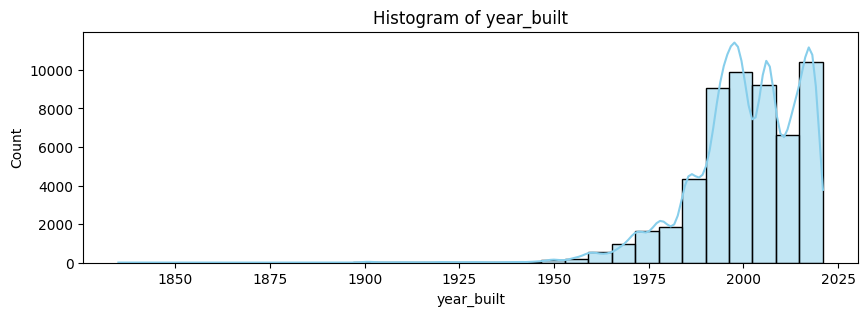

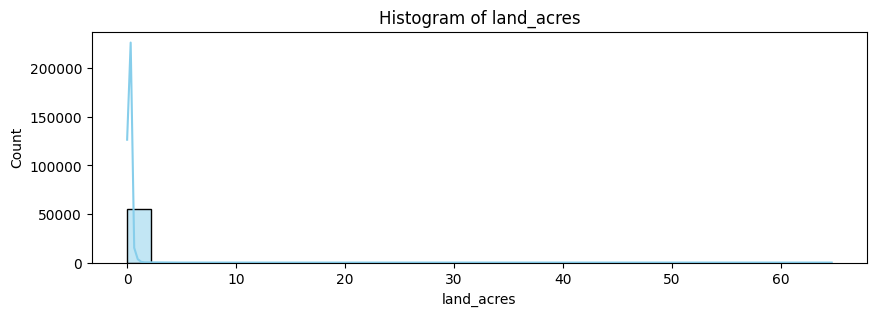

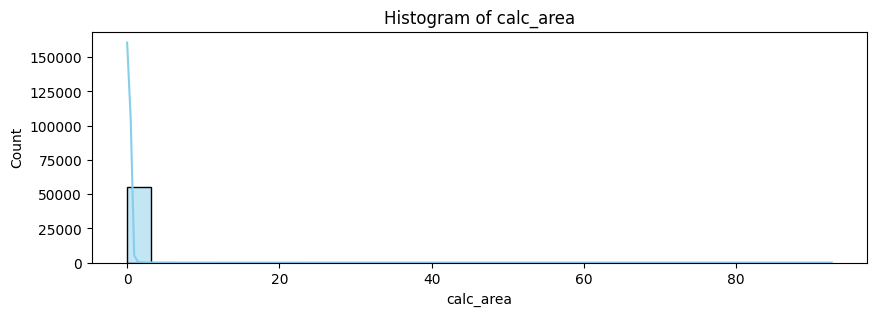

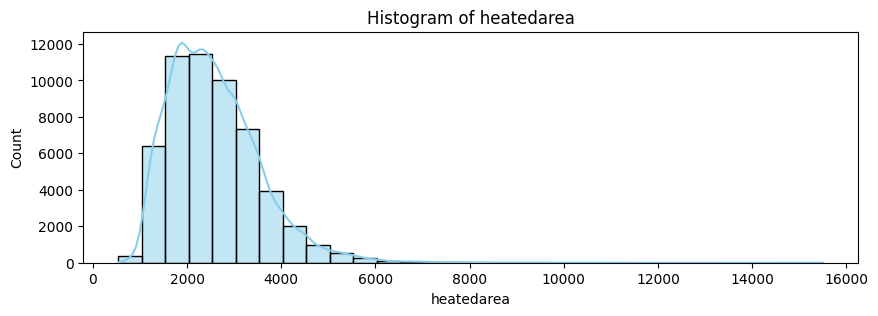

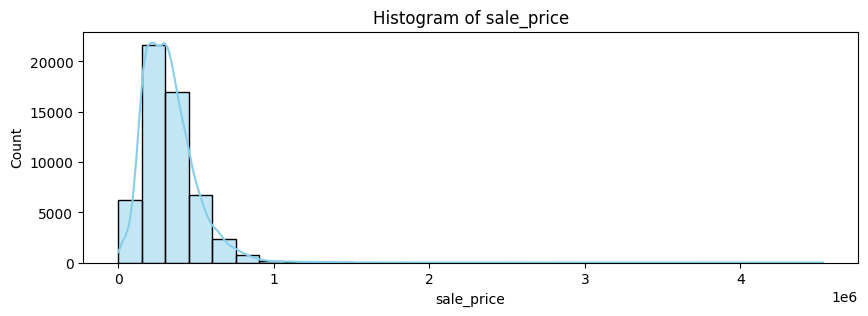

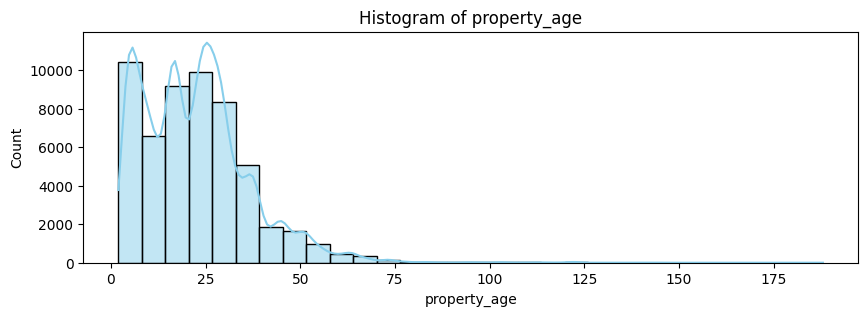

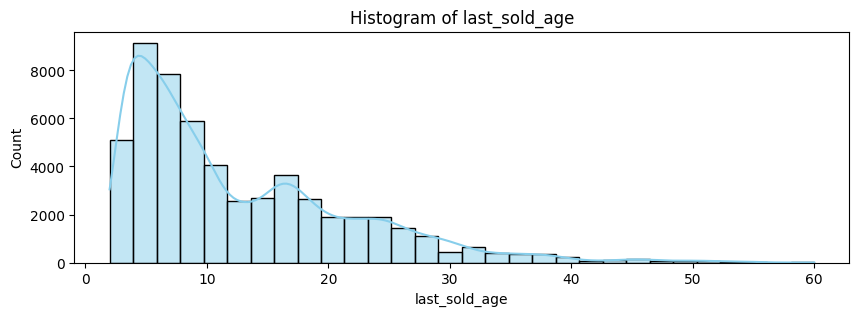

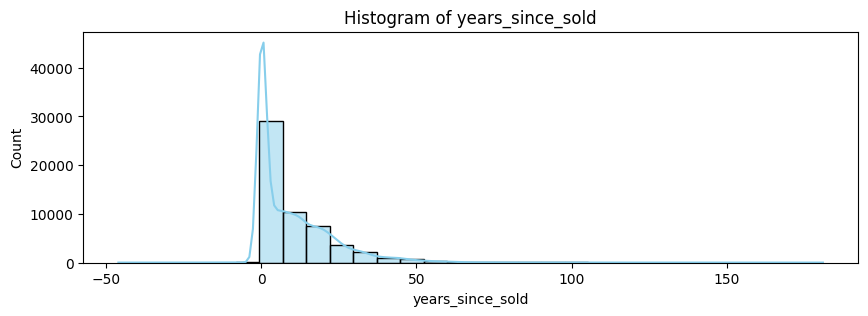

In [ ]:
numeric_features = ['year_built', 'land_acres', 'calc_area',
       'heatedarea', 'sale_price', 'property_age', 'last_sold_age',
       'years_since_sold']

for feature in numeric_features:

  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.histplot(wake,x=feature, bins=30, kde=True, color='skyblue')
  # Set the title and x-label
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()


**Boxplots**: Useful for identifying outliers.



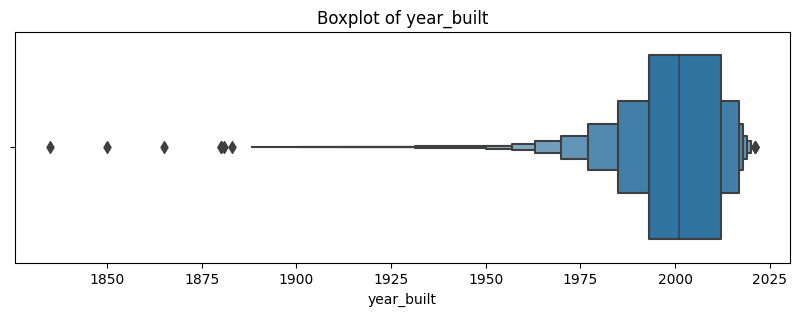

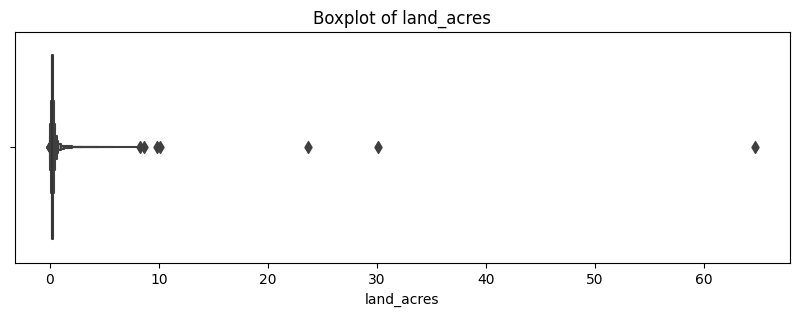

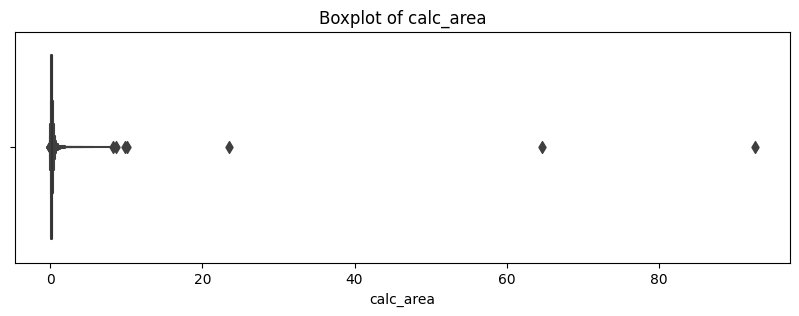

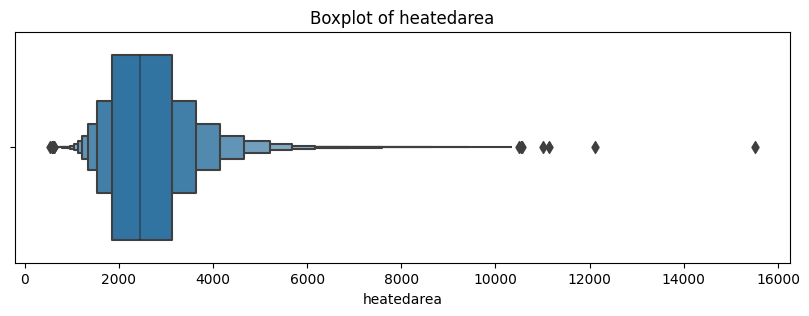

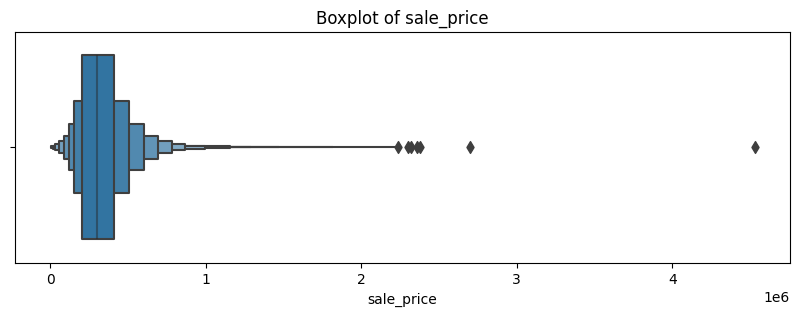

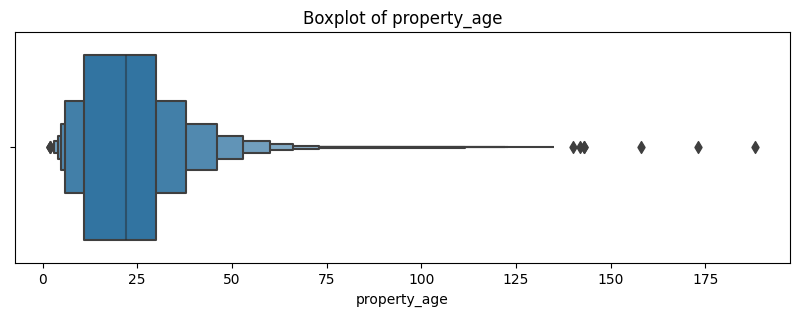

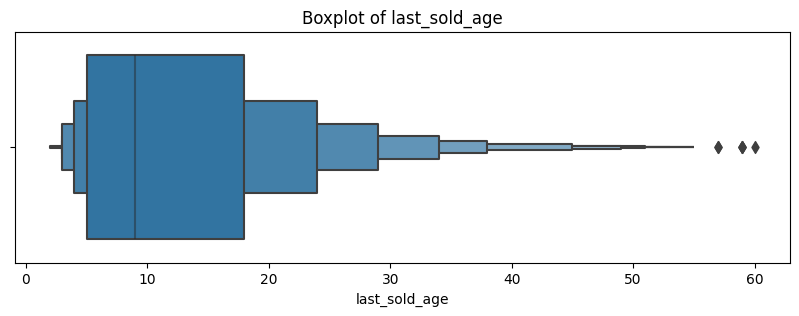

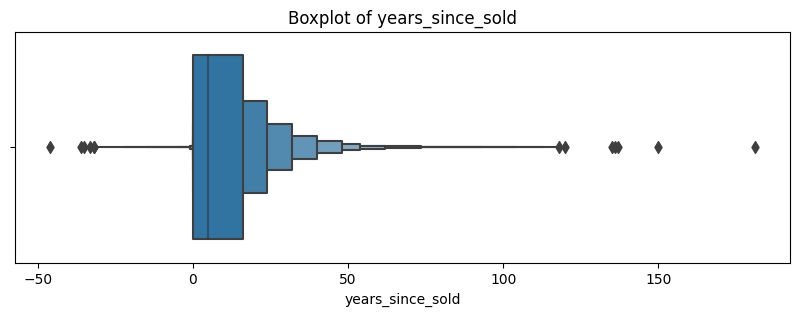

In [ ]:
for feature in numeric_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxenplot(wake,x=feature)
  # Set the title and x-label
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

**Statistics**: Understand the central tendency and spread of each variable.

In [ ]:
wake[numeric_features].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
year_built,55007.0,2000.550439,14.222397,1835.000000,1993.000000,2001.000000,2012.000000,2.021000e+03
land_acres,55007.0,0.254470,0.395968,0.010000,0.140000,0.230000,0.320000,6.467000e+01
calc_area,55007.0,0.255168,0.542764,0.002129,0.136368,0.230486,0.315789,9.256310e+01
heatedarea,55007.0,2577.681095,970.163919,540.000000,1860.000000,2442.000000,3128.000000,1.550400e+04
sale_price,55007.0,325386.775956,170549.263413,500.000000,205000.000000,300000.000000,411000.000000,4.530000e+06
property_age,55007.0,22.449561,14.222397,2.000000,11.000000,22.000000,30.000000,1.880000e+02
last_sold_age,55007.0,12.562310,9.236060,2.000000,5.000000,9.000000,18.000000,6.000000e+01
years_since_sold,55007.0,9.887251,12.602470,-46.000000,0.000000,5.000000,16.000000,1.810000e+02


## 3. **Bivariate Analysis**


---


For each feature with respect to the TARGET VARAIBLE:

- **Scatter plots**: Understand the relationship between the feature and the target variable.

- **Correlation**: Calculate the correlation coefficient to quantify the linear relationship.

- **Cross-tabulation and other visualizations**: Especially useful if either the target or feature is categorical.

## **Scatter plots**:


---


Understand the relationship between the feature and the target variable.

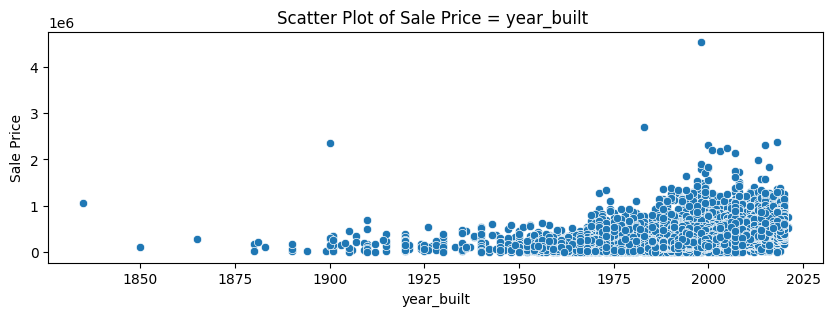

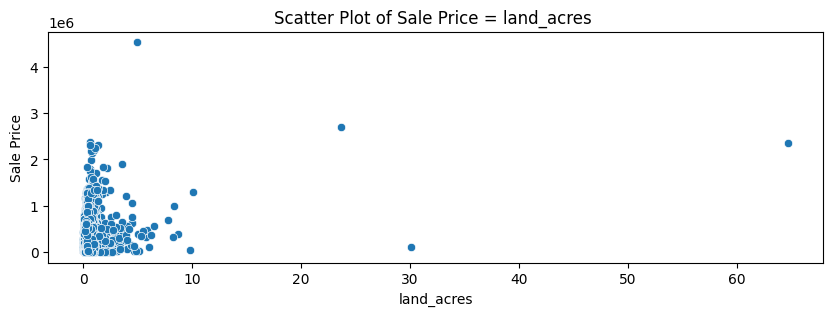

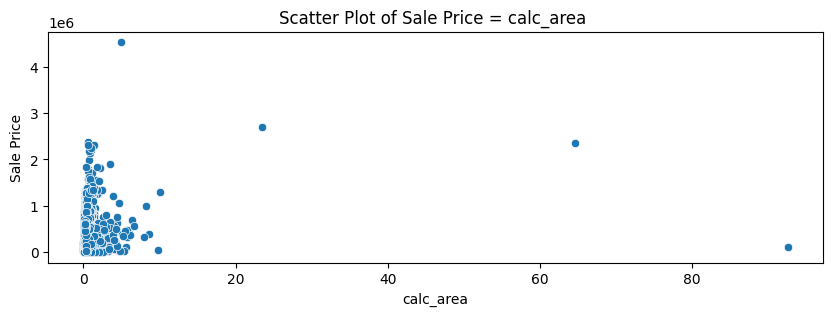

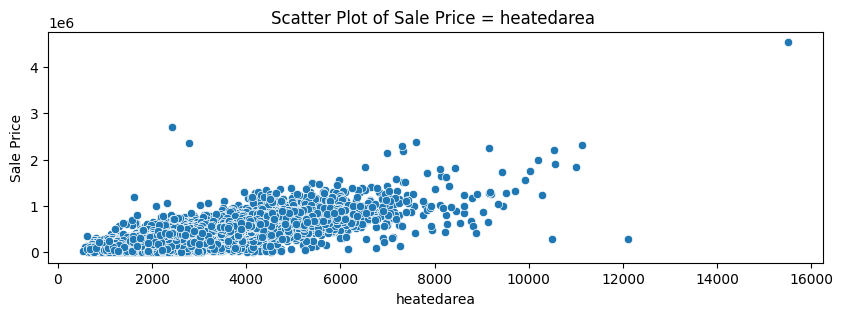

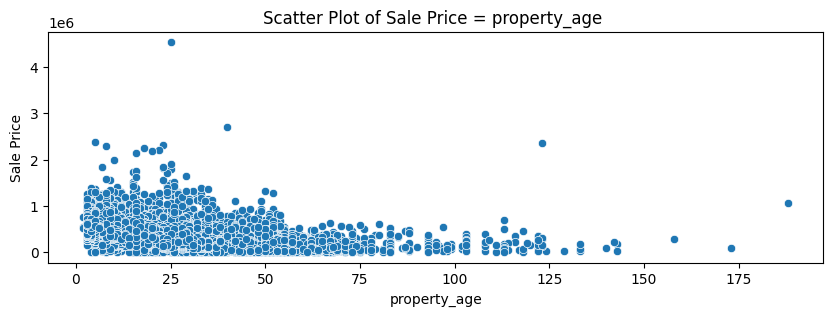

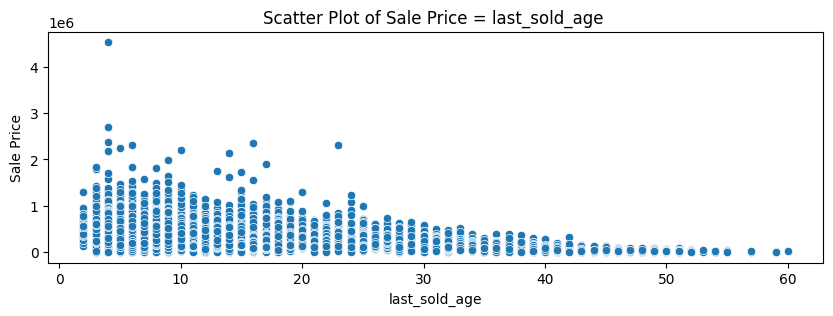

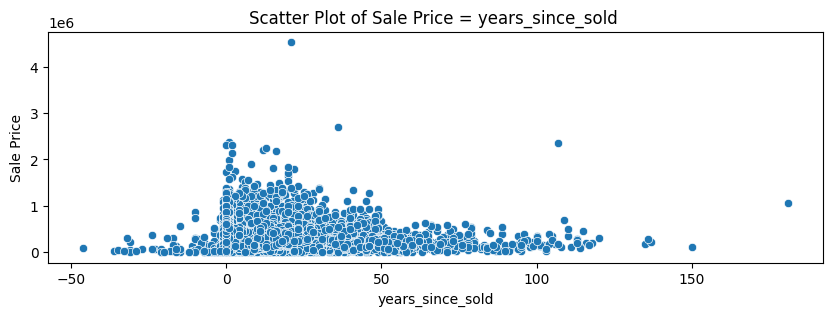

In [ ]:
for feature in numeric_features:
  if feature != 'sale_price':
    # Set the figure size
    plt.figure(figsize=(10, 3))
    # Create the histogram using seaborn
    sns.scatterplot(wake,x=feature, y='sale_price')
    # if you want a linear line
    # sns.regplot(wake,x=feature, y='sale_price', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})

    # Set the title and x-label
    plt.title(f'Scatter Plot of Sale Price = {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    # Display the plot
    plt.show()

## **Correlation**:


---


Calculate the correlation coefficient to quantify the linear relationship.

In [ ]:
# Compute the correlation of each variable with the target
correlations = wake[numeric_features].apply(lambda x: x.corr(wake['sale_price']))
df_correlations = correlations.to_frame(name='correlation')
#df_correlations.columns = ['feature', 'correlation']
df_correlations = df_correlations.sort_values('correlation', ascending=False)
df_correlations


,correlation
sale_price,1.000000
heatedarea,0.804692
year_built,0.466785
land_acres,0.160045
calc_area,0.114105
years_since_sold,-0.168595
property_age,-0.466785
last_sold_age,-0.488747


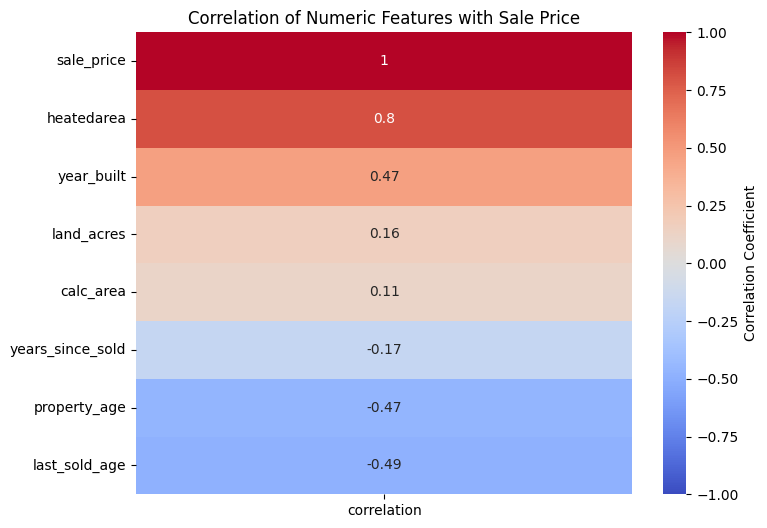

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlations,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation of Numeric Features with Sale Price')
plt.show()

# Cross-tabulation and other visualizations:


---


Especially useful if either the target or feature is categorical.

1. boxplot category to target
2. pivot table category to target mean

In [ ]:
# Get the list of numeric columns
categorical_columns = wake.select_dtypes(include=['object']).columns
categorical_columns


Index(['owner', 'site_address', 'city', 'city_state_zip'], dtype='object')

In [ ]:
categorical_features = ['zip_code','city']

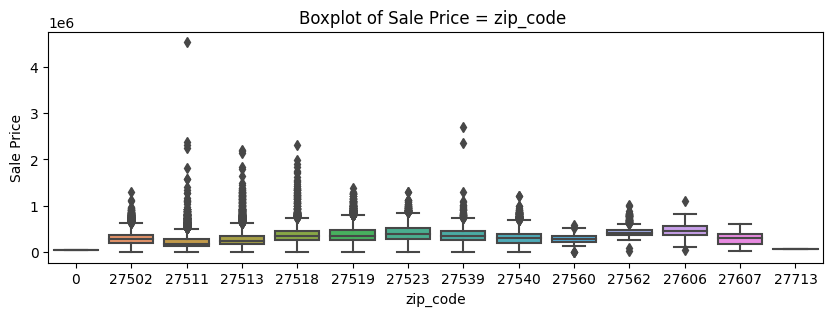

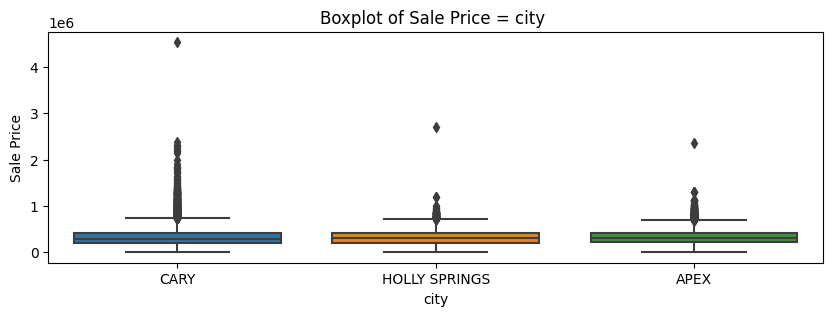

In [ ]:
for category in categorical_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxplot(wake,x=category, y='sale_price')
  plt.title(f'Boxplot of Sale Price = {category} ')
  plt.xlabel(category)
  plt.ylabel('Sale Price')
  # Display the plot
  plt.show()

# Pivot Table


In [ ]:
pivot_table_result = pd.pivot_table(wake,
                                    index='zip_code',
                                    columns='city',
                                    values='sale_price',
                                    fill_value=0,
                                    aggfunc=['mean','count']).round(1)
pivot_table_result


mean                         count                     
city          APEX      CARY HOLLY SPRINGS  APEX   CARY HOLLY SPRINGS
zip_code                                                             
0          43500.0       0.0           0.0     1      0             0
27502     302942.7       0.0           0.0  9775      0             0
27511          0.0  219704.2           0.0     0   6570             0
27513     690000.0  286978.6           0.0     2   8597             0
27518          0.0  372767.1           0.0     0   3981             0
27519     582850.6  389425.0           0.0    77  11459             0
27523     412793.3  709118.0           0.0  2568     61             0
27539     275420.8  405306.6      379013.5   688   1047           809
27540          0.0       0.0      313777.3     0      0          7956
27560          0.0  285241.8           0.0     0    612             0
27562     440470.4       0.0           0.0   541      0             0
27606          0.0  480685.5           0.0     0    124             0
27607          0.0  298793.5           0.0     0    138             0
27713          0.0   74000.0           0.0     0      1             0

## Multivariate Analysis

- Correlation matrix or heatmap: Understand the relationships between all variables.

- Pair plots: Scatter plots of all features against each other.



**Correlation**

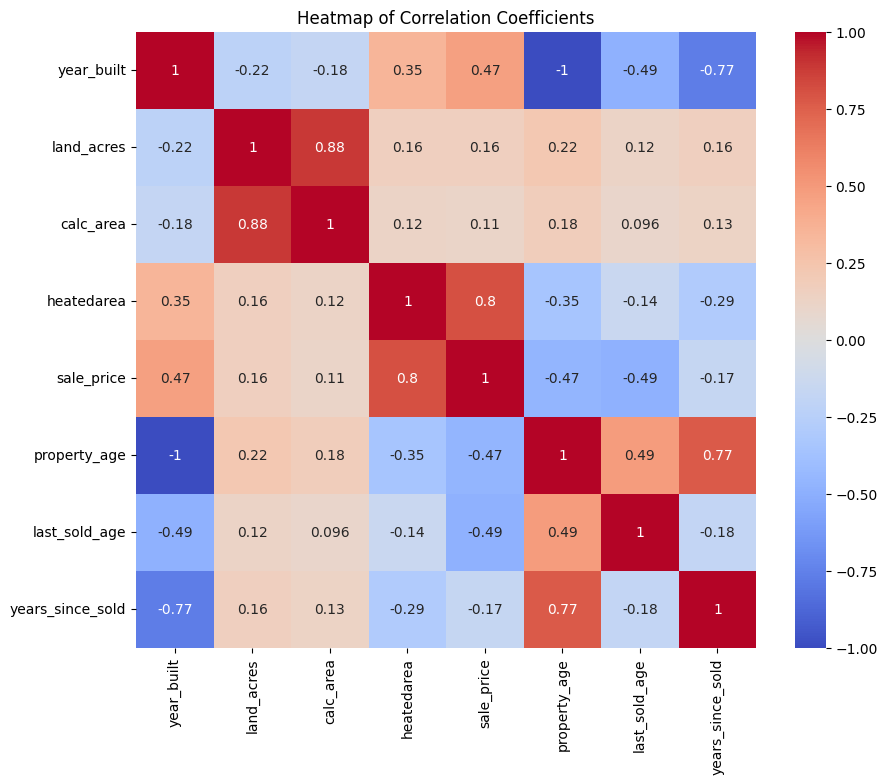

In [ ]:
# Calculating the correlation matrix
correlation_matrix_wake = wake[numeric_features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_wake, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

In [ ]:
wake[['property_age','sale_price','heatedarea']].corr()

,property_age,sale_price,heatedarea
property_age,1.000000,-0.466785,-0.351493
sale_price,-0.466785,1.000000,0.804692
heatedarea,-0.351493,0.804692,1.000000


**PAIR PLOTs**

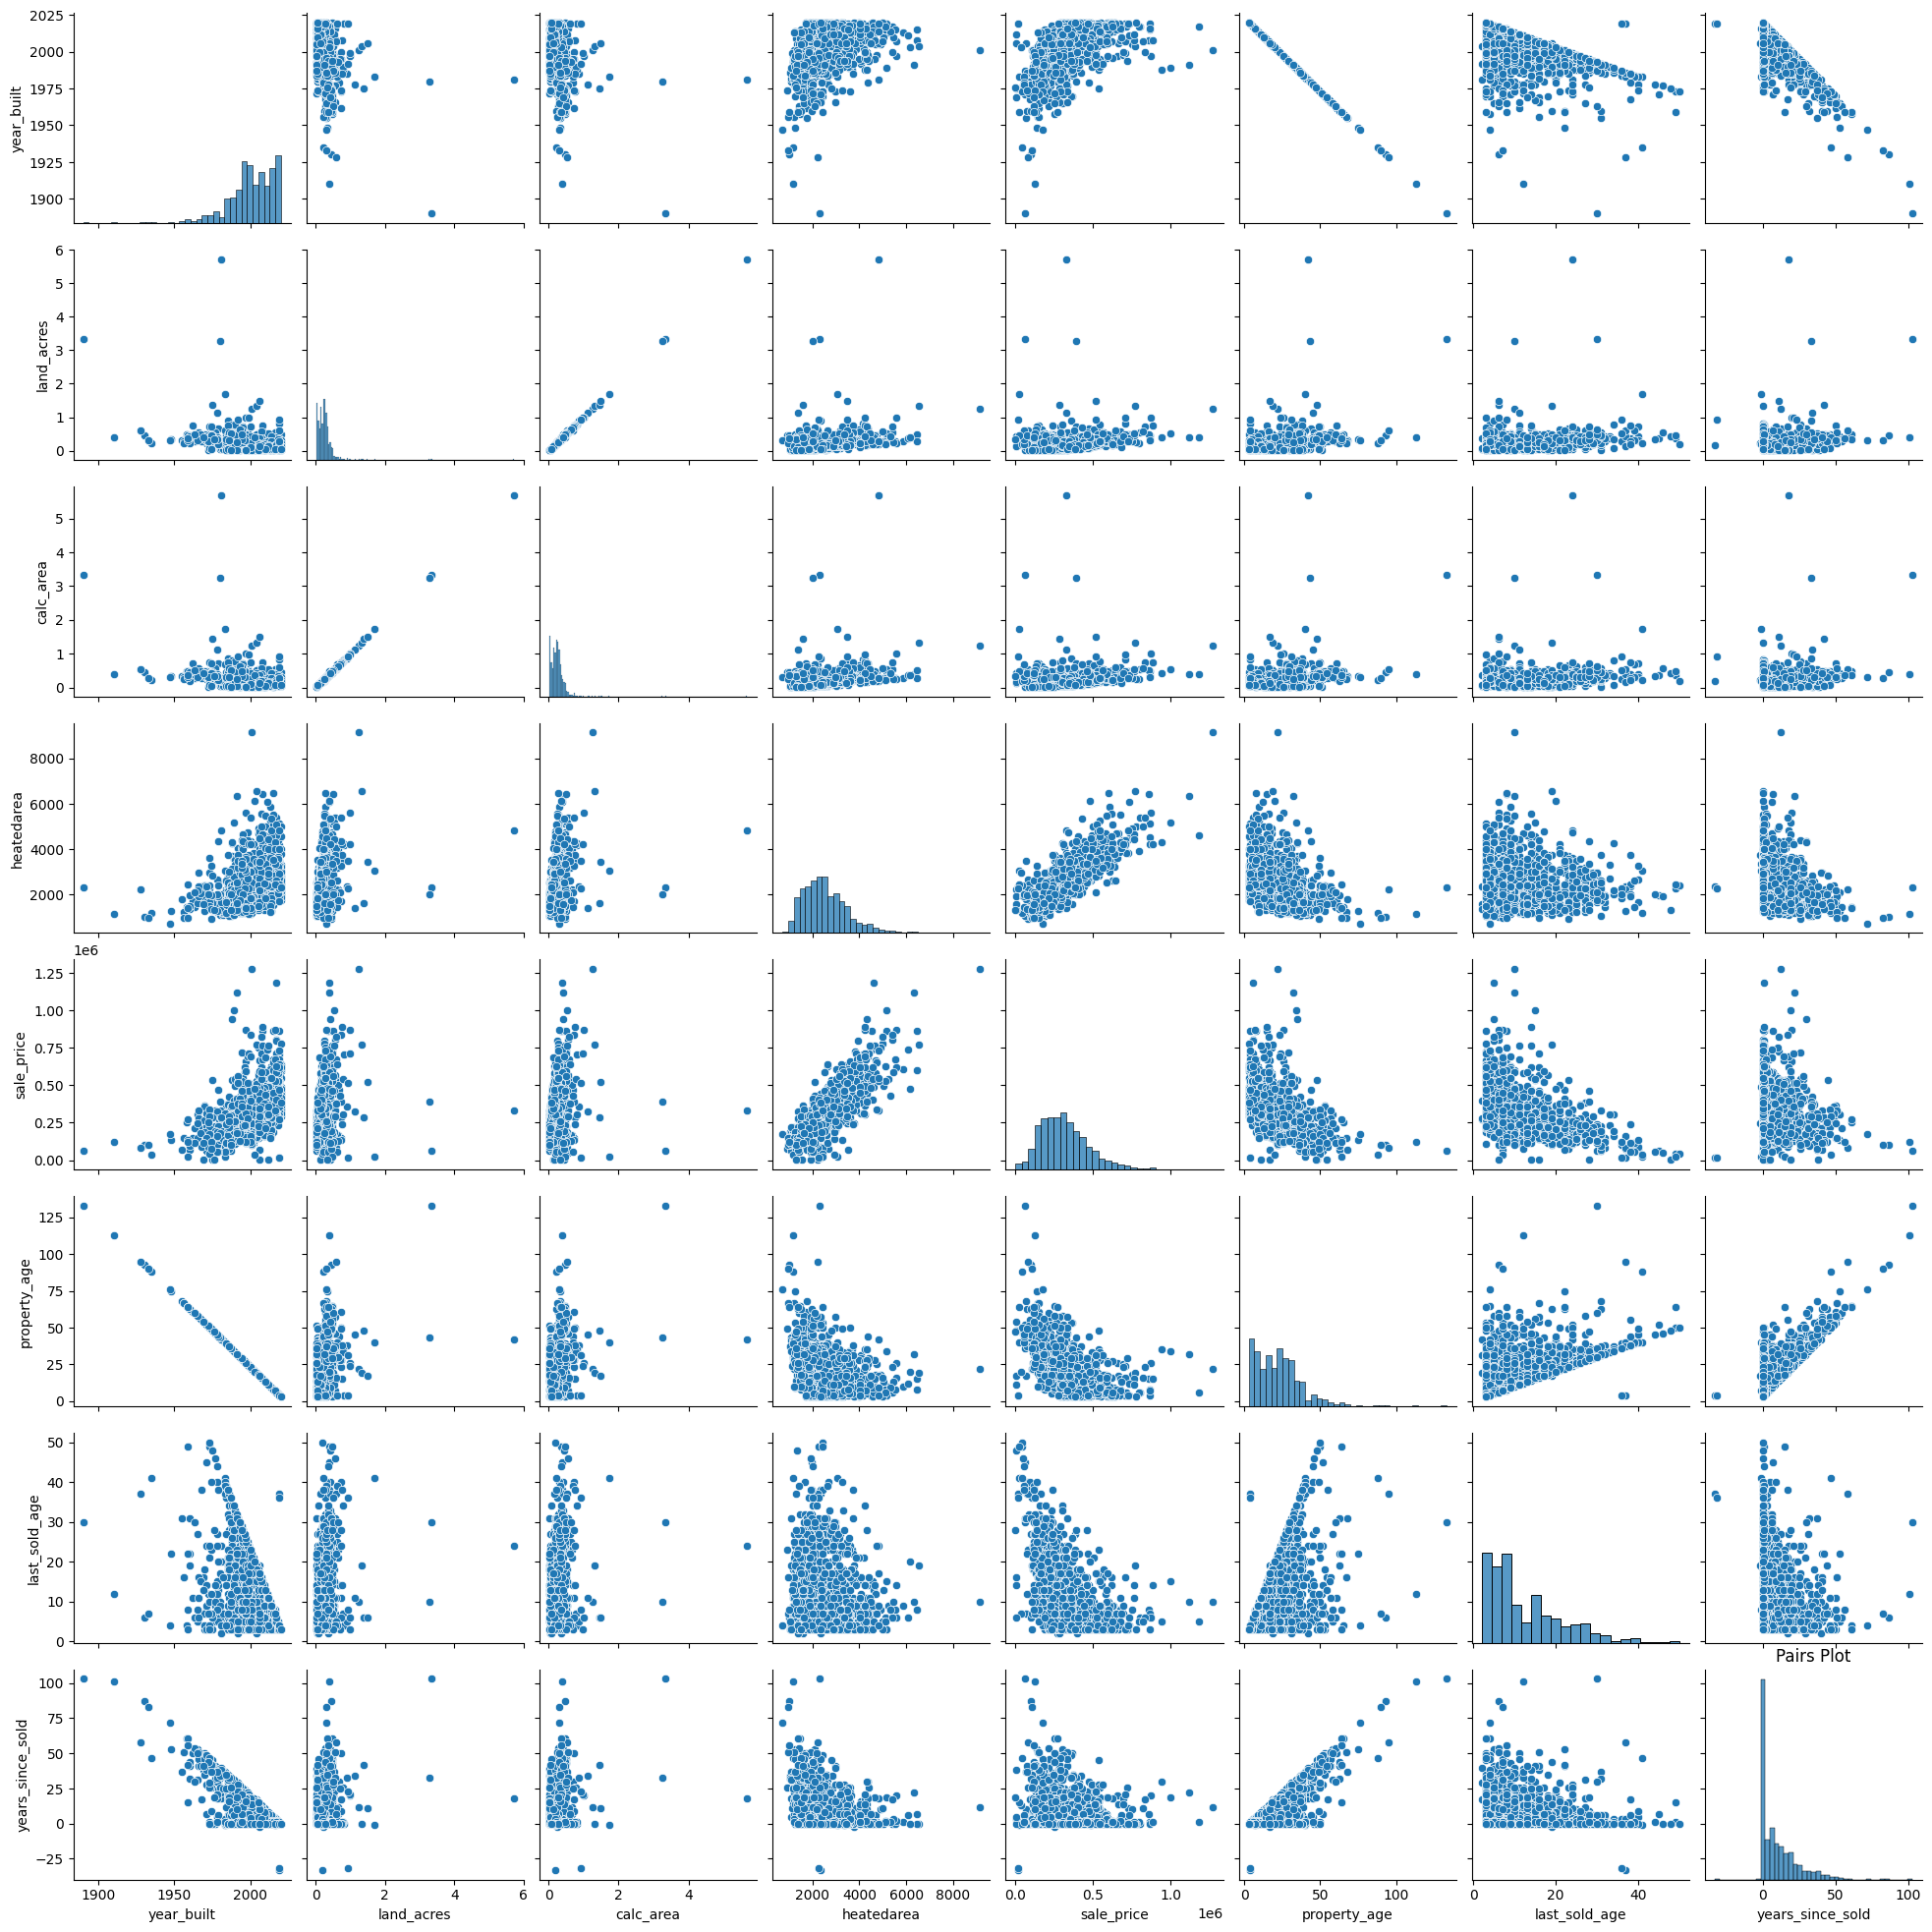

In [ ]:
sns.pairplot(wake[numeric_features].sample(1000))
plt.title('Pairs Plot')
plt.show()

5. Outlier Detection and Treatment

- Statistical methods: Use methods like Z-score or IQR to detect outliers.

- Visual methods: Boxplots, scatter plots.
-
Treatment: Decide whether to remove, cap/floor, or transform outliers.

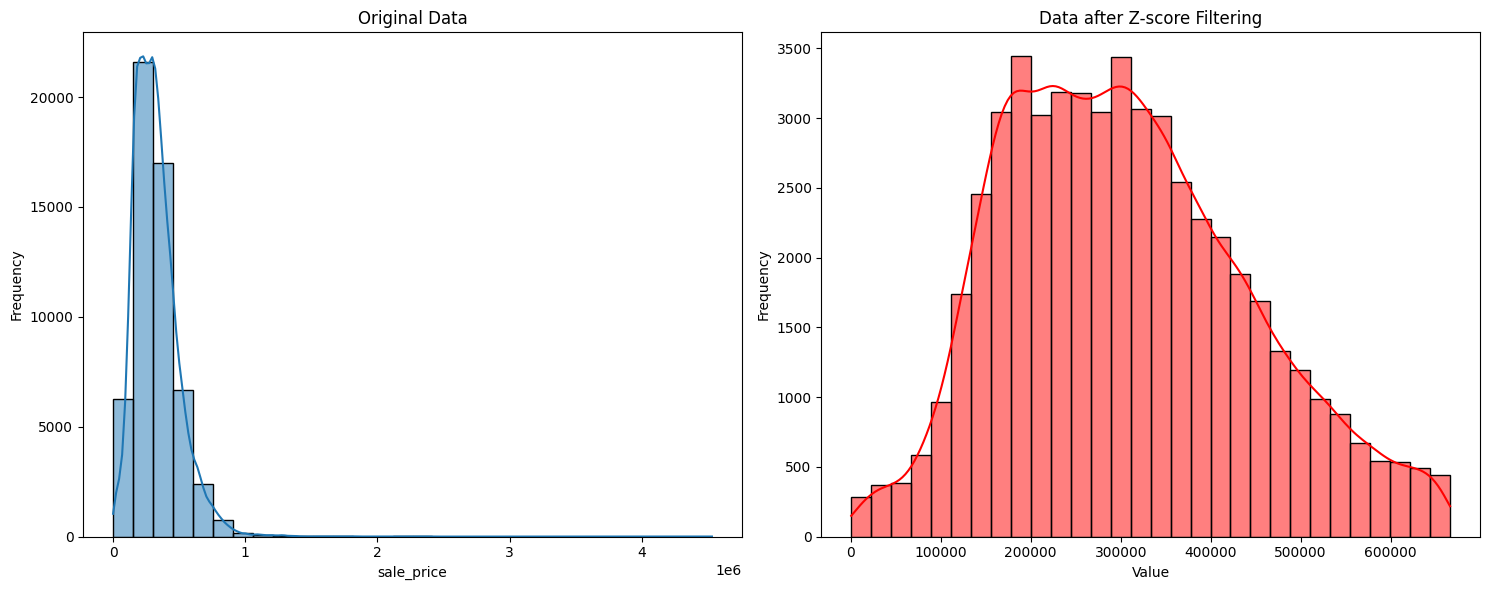

In [ ]:
from scipy.stats import zscore
# Calculate Z-scores
z_scores = zscore(wake['sale_price'])
# Get boolean array indicating the presence of outliers
# Here, we consider data points with Z-scores > 2 or < -2 as outliers
outliers = np.where((z_scores > 2) | (z_scores < -2))
# Filter out the outliers
filtered_data = wake[~(z_scores > 2) | (z_scores < -2)]
# Plotting original data and filtered data
plt.figure(figsize=(15, 6))
# Original Data
plt.subplot(1, 2, 1)
sns.histplot(wake['sale_price'], kde=True, bins=30)
plt.title('Original Data')
plt.xlabel('sale_price')
plt.ylabel('Frequency')
# Filtered Data
plt.subplot(1, 2, 2)
sns.histplot(filtered_data['sale_price'], kde=True, bins=30, color='r')
plt.title('Data after Z-score Filtering')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Cap


count    5.500700e+04
mean     3.253868e+05
std      1.705493e+05
min      5.000000e+02
25%      2.050000e+05
50%      3.000000e+05
75%      4.110000e+05
max      4.530000e+06
Name: sale_price, dtype: float64


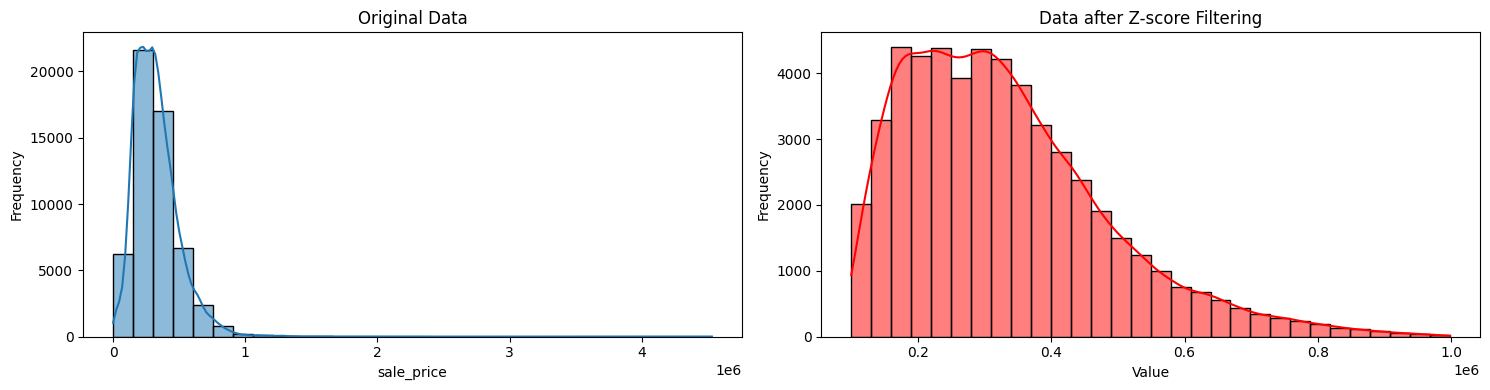

In [ ]:
print(wake['sale_price'].describe())

price_filter = (wake['sale_price'] < 1000000 ) & (wake['sale_price'] > 100000)
wake_filtered = wake[price_filter]
print(wake_filtered['sale_price'].describe())


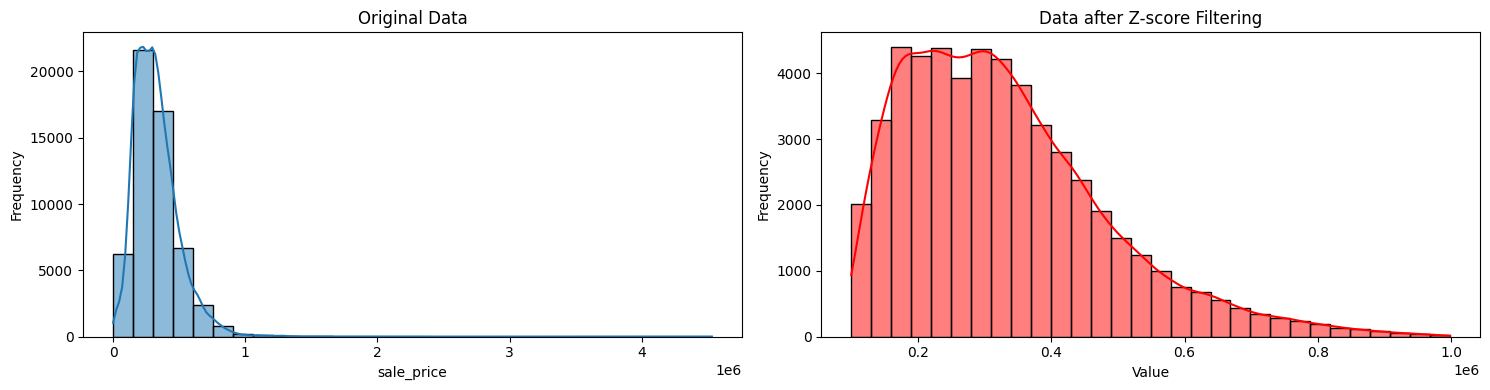

In [ ]:
# Original Data
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.histplot(wake['sale_price'], kde=True, bins=30)
plt.title('Original Data')
plt.xlabel('sale_price')
plt.ylabel('Frequency')
# Filtered Data
plt.subplot(1, 2, 2)
sns.histplot(wake_filtered['sale_price'], kde=True, bins=30, color='r')
plt.title('Data after Z-score Filtering')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Linear Assumptions


---

